###  Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

### Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

### Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

### Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

# Import Libraries and Load/prepare Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

from src.visualization.visualize import visualization as graphs
from src.features.build_features import Feat_select as Fs
from src.models.train_model import models_methods as train_methods

print('_______All Packages have been installed._______')

_______All Packages have been installed._______


In [2]:
df = pd.read_csv('../data/raw/ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
#shape of dataset
df.shape

(126, 7)

In [4]:
#checking for empty cells
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [5]:
#checking for duplicate rows
df.duplicated().sum()

16

In [6]:
#removing duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(110, 7)

# Exploratory Data Analysis

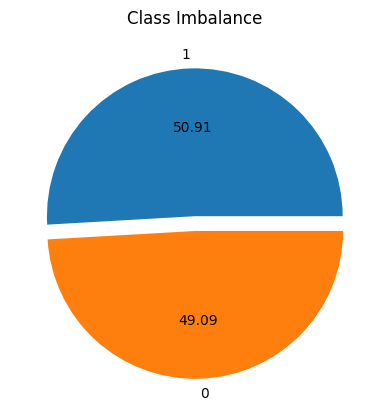

In [7]:
#Checking for dataset Imbalance (Slight imbalnce in dataset)
plt.pie(df['Y'].value_counts(),labels=df['Y'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

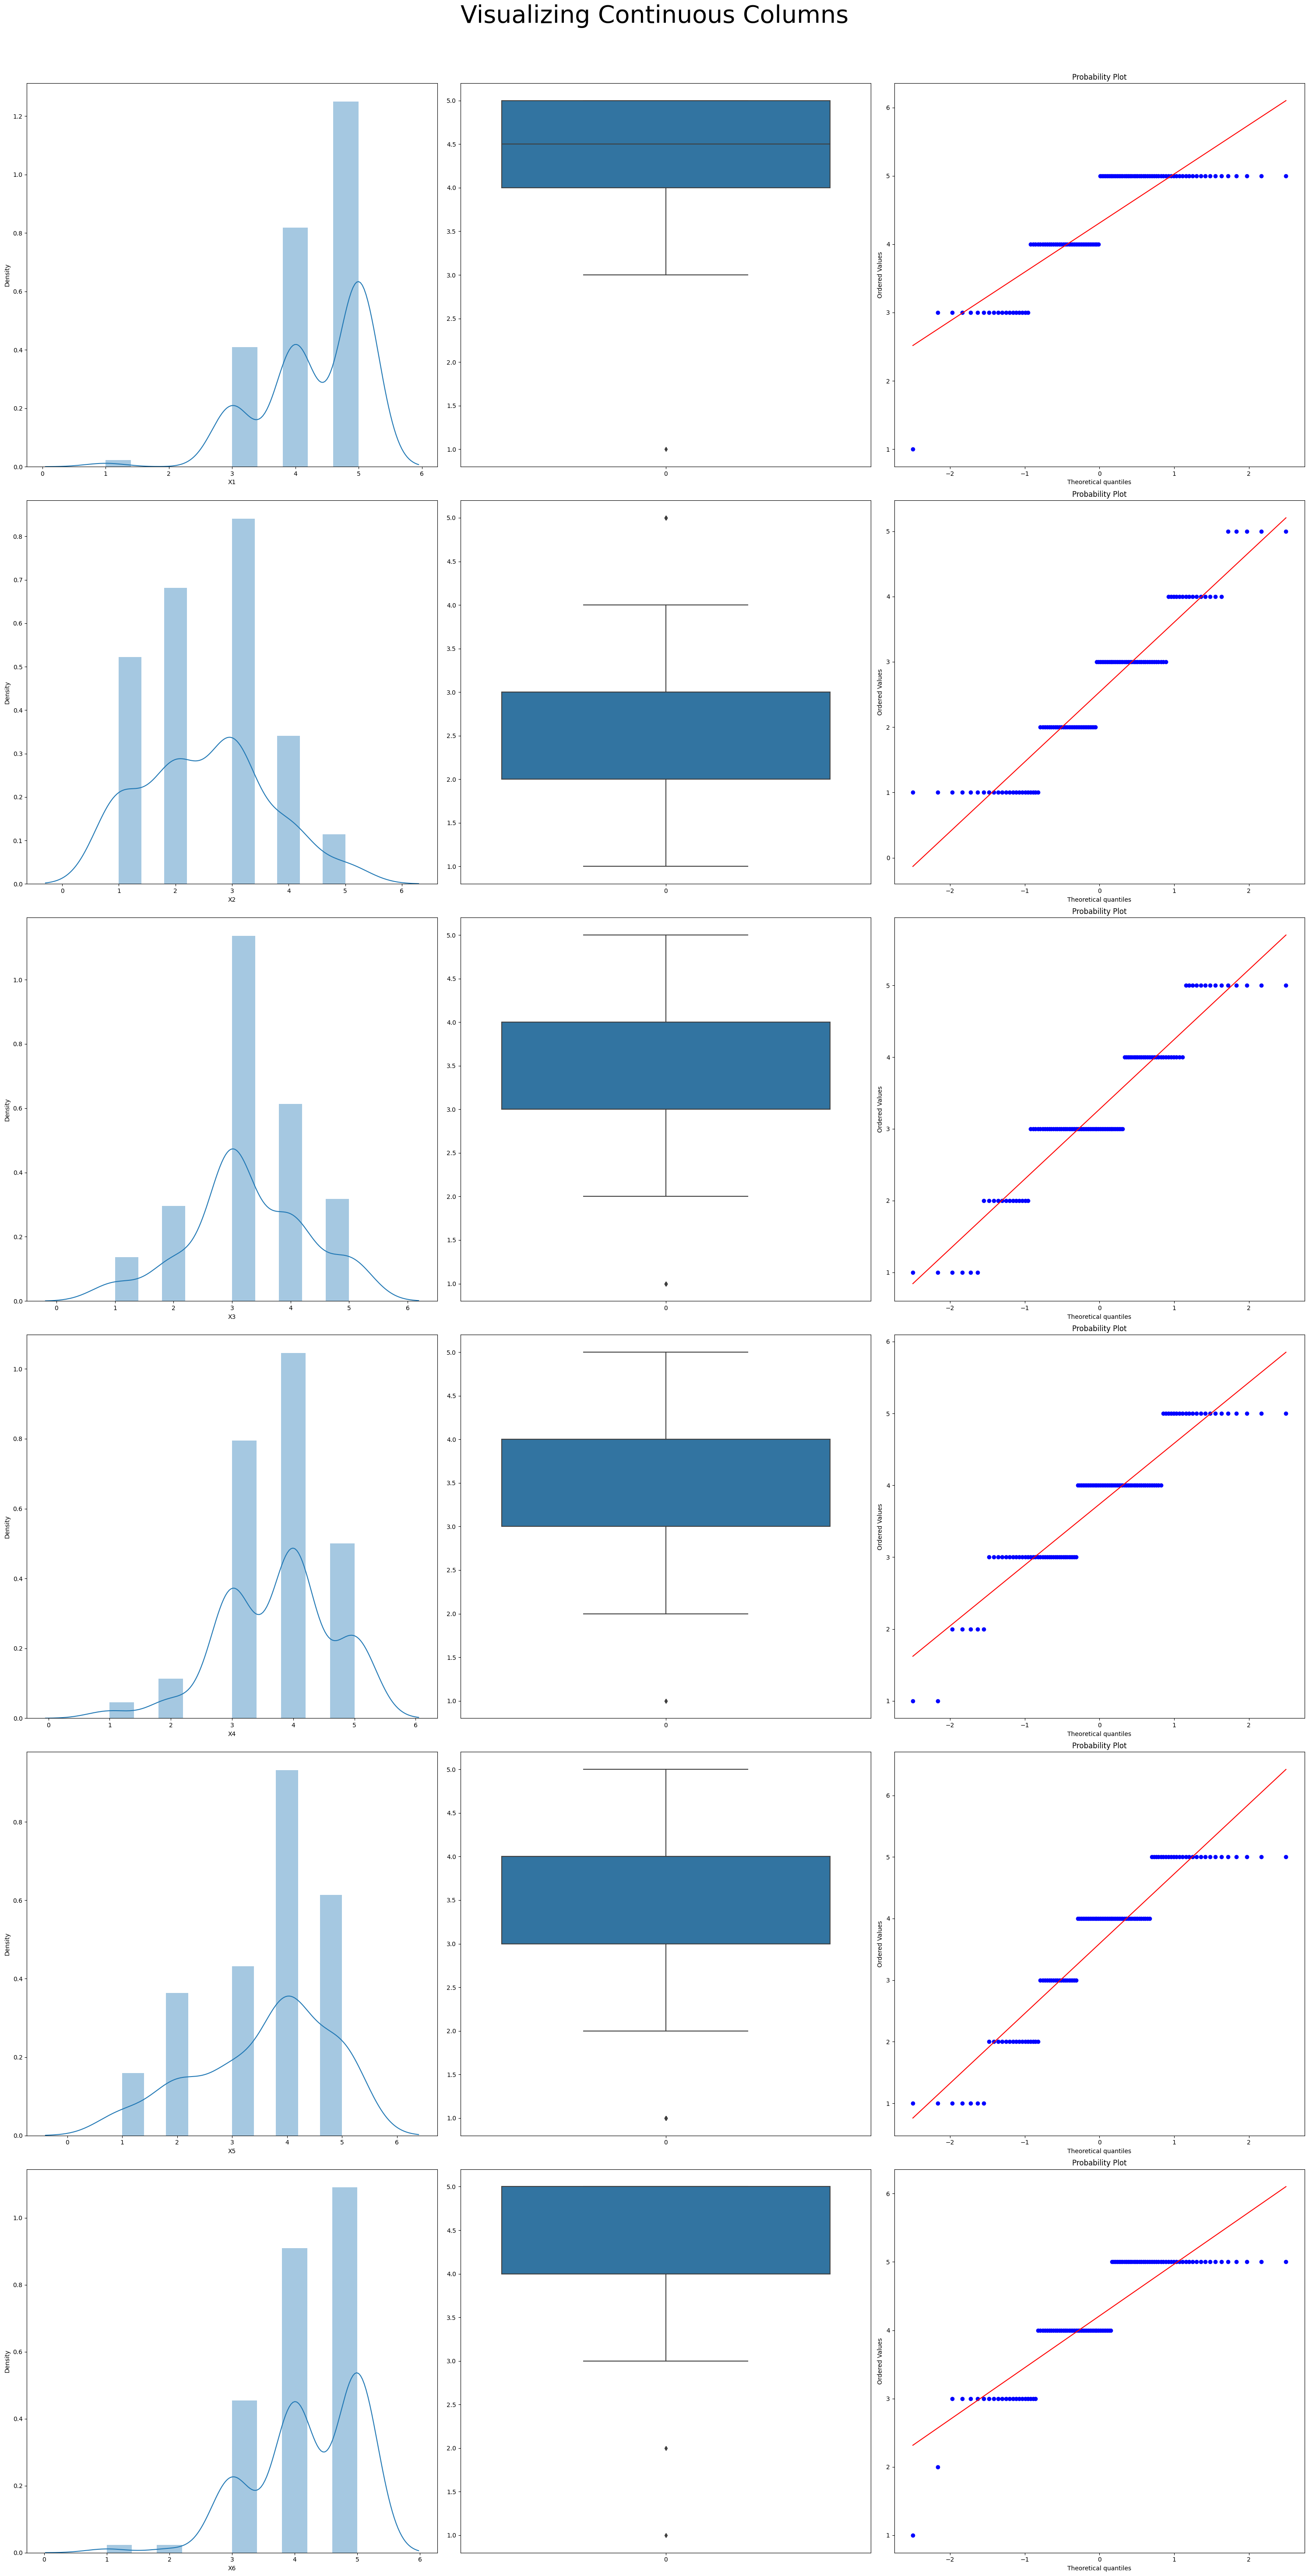

In [8]:
graphs.EDA(df)

In [9]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
X1   -1.047402
X6   -0.892167
X5   -0.618201
X4   -0.467505
X3   -0.141364
Y    -0.036874
X2    0.258575
dtype: float64


<AxesSubplot:>

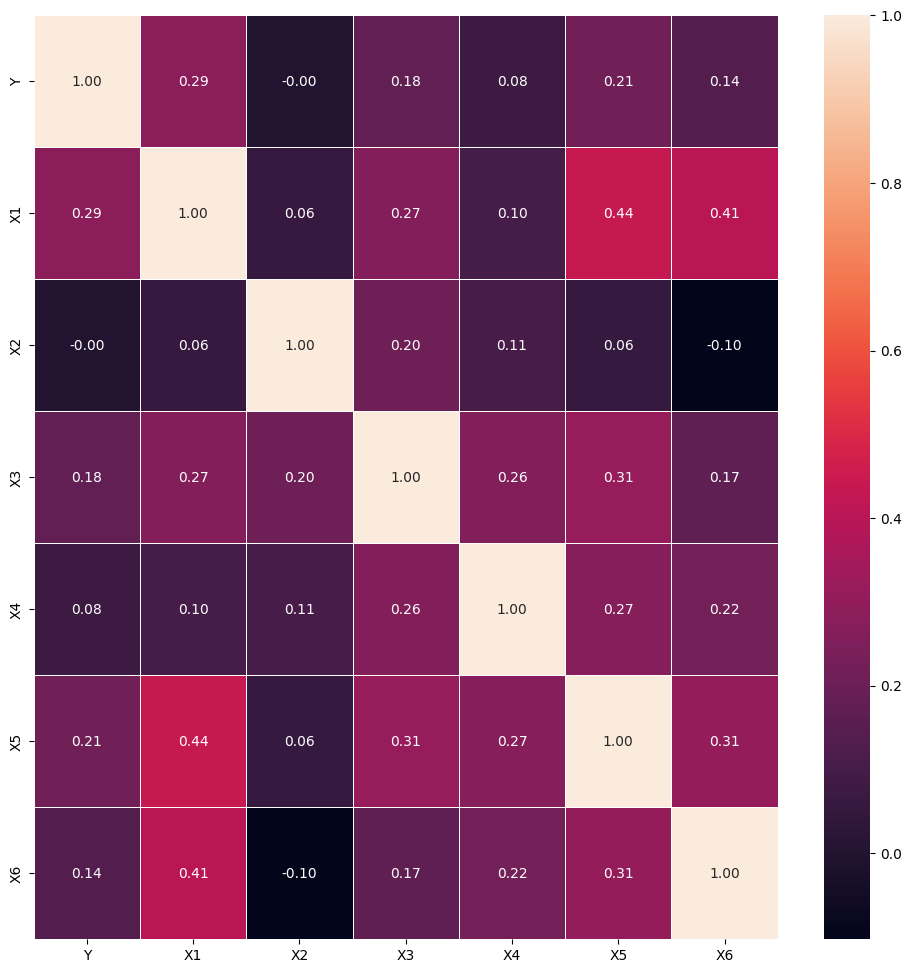

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

# Feature Selection and Preprocessing

I have divided feature selection into two categories for ease:

1- Manual Selection

Upon reading the project Description I analysed that 4 total features could be considered important regarding customer's needs. I have listed them below:

1.   X1
2.   X2
3.   X5
4.   X6

2- Statistical feature selection

This feature selection approach uses staticical measures to find useful features for training.

However full dataset is also used for training for comparison with feature selection apporaches.

To choose the method, just run the cell with its respective heading, e.g. run celect with heading Manual feature selection for manual selection and so on.

### Using Full Dataset

In [11]:
X_clean,y_clean = Fs.select_full_features(df)

(108, 6)


### Manual Feature Selection/Preprocessing

In [12]:
X_clean,y_clean = Fs.manual_select_features(df)

### Feature selection using statistical measures

In [11]:
X_clean,y_clean = Fs.stats_select_features(df)

Total Features  ['X1' 'X2' 'X3' 'X4' 'X5' 'X6']
Selected Features for training  ['X1' 'X3' 'X5' 'X6']


Feature list: ['X1' 'X2' 'X3' 'X4' 'X5' 'X6']

Selected Features for training: ['X1' 'X3' 'X5' 'X6']

# Train test split

In [12]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

# Method 1

# Parameters Optimization(Support Vector Machine)

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf','poly']}
svc = SVC()
train_methods.first_method(svc, param_grid, X_train, y_train, X_test, y_test)

# Parameters Optimization(Decision tree classifier)

In [ ]:
param_grid={ 'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12]}
dtc = DecisionTreeClassifier()
train_methods.first_method(dtc, param_grid, X_train, y_train, X_test, y_test)

# Parameters Optimization (Logistic Regression)

In [ ]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100],
    'max_iter':[50,75,100,200,300,400,500,700],
    'solver': ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
}
log=LogisticRegression()
train_methods.first_method(log, param_grid, X_train, y_train, X_test, y_test)

# Parameters Optimization(Random Forest Classifier)

In [ ]:
param_grid = {
    'n_estimators': [50, 75,100, 150, 200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,16],
    'criterion' :['gini', 'entropy']
}
rfc = RandomForestClassifier()
train_methods.first_method(rfc, param_grid, X_train, y_train, X_test, y_test)

# Parameters Optimization (Gradient Boosting Classifier)

In [ ]:
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=GradientBoostingClassifier()
train_methods.first_method(gbc, param_grid, X_train, y_train, X_test, y_test)

# Method 2

This method uses nested cross validation for parameter optimization

## Parameters Optimization (Decision Tree Classifier)

In [ ]:
# for GridsearchCV 
# define the model
dtc = DecisionTreeClassifier()
#creating a pipeline
pipe = Pipeline(steps=[('dtc', dtc)])
#parameters used for optimisation
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dtc__criterion = criterion, dtc__max_depth = max_depth)

In [ ]:
train_methods.second_method(pipe, parameters, X_clean, y_clean)

## Parameters Optimization (Support Vector Machine)

In [ ]:
# for GridsearchCV 
# define the model
svc = SVC()
#creating a pipeline
pipe = Pipeline(steps=[('svc', svc)])
#parameters used for optimisation
C = [0.001,0.01,0.1,1,10,100]
gamma = [0.001,0.01,0.1,1,10,100]
kernel = ['linear','rbf','poly']
parameters = dict(svc__C = C, svc__gamma = gamma, svc__kernel = kernel)

In [ ]:
train_methods.second_method(pipe, parameters, X_clean, y_clean)

## Parameters Optimization (Logistic Regression)

In [ ]:
# for GridsearchCV 
# define the model
log = LogisticRegression()
#creating a pipeline
pipe = Pipeline(steps=[('log', log)])
#parameters used for optimisation
solver = ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
C = [0.001,0.01,0.1,1,10,100]
max_iter = [50,75,100,200,300,400,500,700]
parameters = dict(log__solver = solver, log__C = C, log__max_iter = max_iter)

In [ ]:
train_methods.second_method(pipe, parameters, X_clean, y_clean)

## Parameters Optimization (Gradient Boosting classifier)

In [ ]:
# for GridsearchCV 
# define the model
gbc = GradientBoostingClassifier()
#creating a pipeline
pipe = Pipeline(steps=[('gbc', gbc)])
#parameters used for optimisation
learning_rate = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [50, 75,100, 150, 200,300]
parameters = dict(gbc__learning_rate = learning_rate, gbc__n_estimators = n_estimators)

In [ ]:
train_methods.second_method(pipe, parameters, X_clean, y_clean)

## Parameters Optimization (Random Forest Classifier)

In [ ]:
# for GridsearchCV 
# define the model
rfc = RandomForestClassifier()
#creating a pipeline
pipe = Pipeline(steps=[('rfc', rfc)])
#parameters used for optimisation
n_estimators = [10, 100, 500]
max_features = [2, 4, 6]
parameters = dict(rfc__n_estimators = n_estimators, rfc__max_features = max_features)

In [ ]:
train_methods.second_method(pipe, parameters, X_clean, y_clean)